In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.pipeline import make_pipeline
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
sns.set()

In [2]:
df = pd.read_csv('../data/shot-data-all.csv')
df_top = pd.read_csv('../data/top-def.csv')
df_mid = pd.read_csv('../data/mid-def.csv')
df_bot = pd.read_csv('../data/bot-def.csv')

In [3]:
#creating dummy variable
number = LabelEncoder()
df['vs_int'] = number.fit_transform(df['vs'])


In [4]:
X = df[['game_time','shot_made','quarter','home','vs_int','shot_distance']]
y = df['cum_shot_made']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.1)

### Linear Regression

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)
score = reg.score(X_valid,y_valid)
print(score)

0.5009572626925205


### Voting Classifier

In [6]:
#VOTING CLASS
model = VotingClassifier([
       
       ('tree1', DecisionTreeClassifier(max_depth=4)),
       ('tree2', DecisionTreeClassifier(min_samples_leaf=10)),
    ])
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)
print(score)

0.24227174694464415


### Gradient Boost

In [7]:
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)
print(score)

0.5155578284697125


# All team Test

In [8]:
X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value', 'vs_int']]
y = df['cum_shot_made']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)
model = make_pipeline(
    PCA(7), 
    GradientBoostingRegressor()
)
for i in range(0,5):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

    model.fit(X_train,y_train)
    score = model.score(X_valid,y_valid)
    print(score)


0.5470421851143485
0.573884762629886
0.5503760825281383
0.5626920536056252
0.5529435822574151


# Random Forest Model

In [9]:
Houston = df[df['vs'] == 'HOU']
X = Houston[['game_time','shot_made','quarter','home','shot_distance','shot_value']]
y = Houston['cum_shot_made']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)


model = RandomForestRegressor()
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)
print(score)

0.4093654606526468


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### PCA

In [10]:
Houston = df[df['vs'] == 'HOU']
X = Houston[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = Houston['cum_shot_made']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)


model = make_pipeline(
    StandardScaler(),
    PCA(2), 
    GradientBoostingRegressor()
)
#for i in range(0,10):
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))


0.7667384140717778
0.8676504903781815


In [11]:
Knicks = df[df['vs'] == 'NYK']
X = Knicks[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = Knicks['cum_shot_made']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)


model = make_pipeline(
    StandardScaler(),
    PCA(), 
    GradientBoostingRegressor()
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))


0.9624370663997637
0.9974728413182882


In [12]:
X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = df['cum_shot_made']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)


model = make_pipeline(
    StandardScaler(), 
    PCA(), 
    GradientBoostingRegressor()
)
#for i in range(0,10):
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))

0.9787222183787551
0.9829146774746481


In [13]:
model.predict(X_valid)

array([4.32959861, 5.31279516, 8.44924307, ..., 1.4849191 , 5.30917702,
       3.08269257])

In [14]:
y_predicted = model.predict(X_valid)
y_predicted


array([4.32959861, 5.31279516, 8.44924307, ..., 1.4849191 , 5.30917702,
       3.08269257])

In [15]:
r2_score(y_valid, y_predicted)

0.9787222183787551

In [16]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

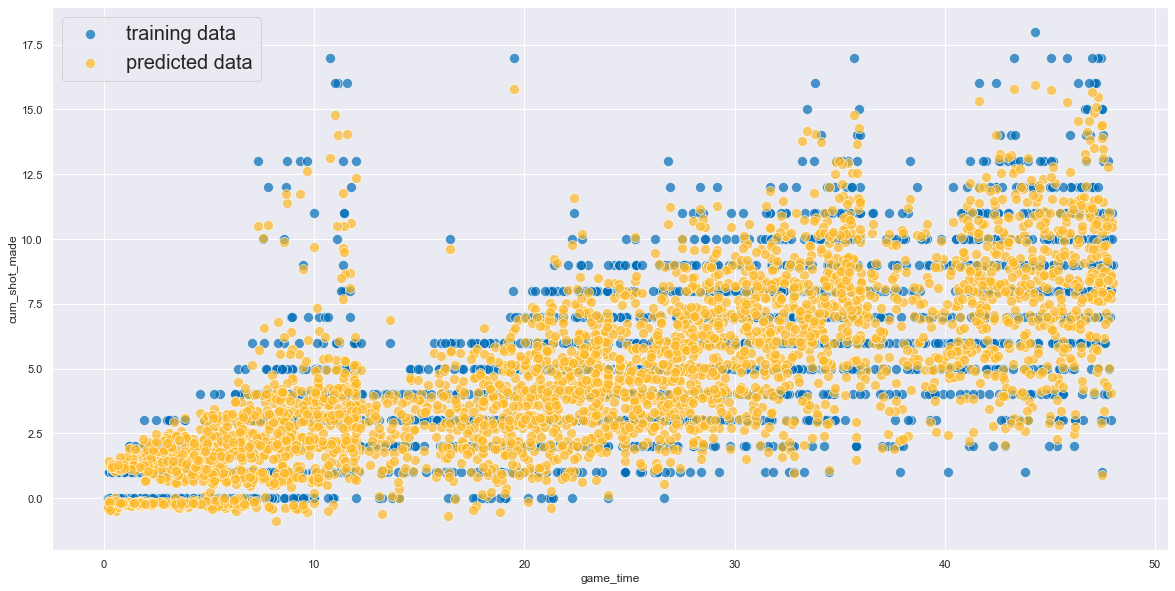

In [17]:
plt.subplots(figsize=(20,10))
sns.scatterplot(X_valid['game_time'],y_valid, alpha=0.7, s=100, label = 'training data')
sns.scatterplot(X_valid['game_time'],y_predicted, alpha=0.7, s=100, label = 'predicted data')
plt.legend(loc=2, prop={'size': 20})

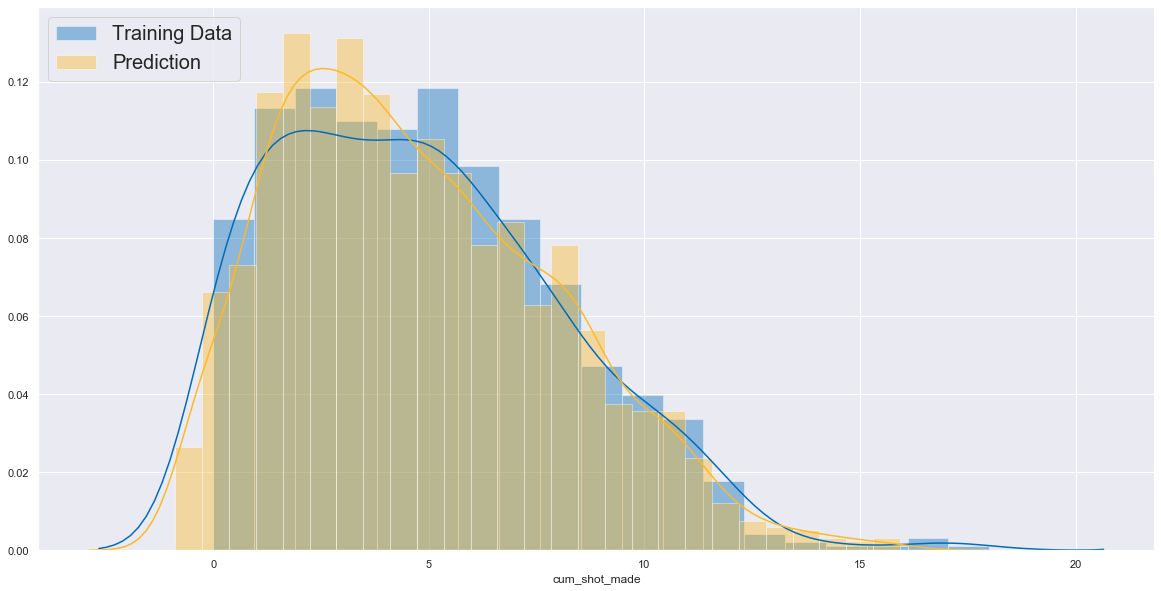

In [29]:
plt.subplots(figsize=(20,10))
sns.distplot(y_valid, label='Training Data')
sns.distplot(y_predicted, label='Prediction')
plt.legend(loc=2, prop={'size': 20})
plt.show()

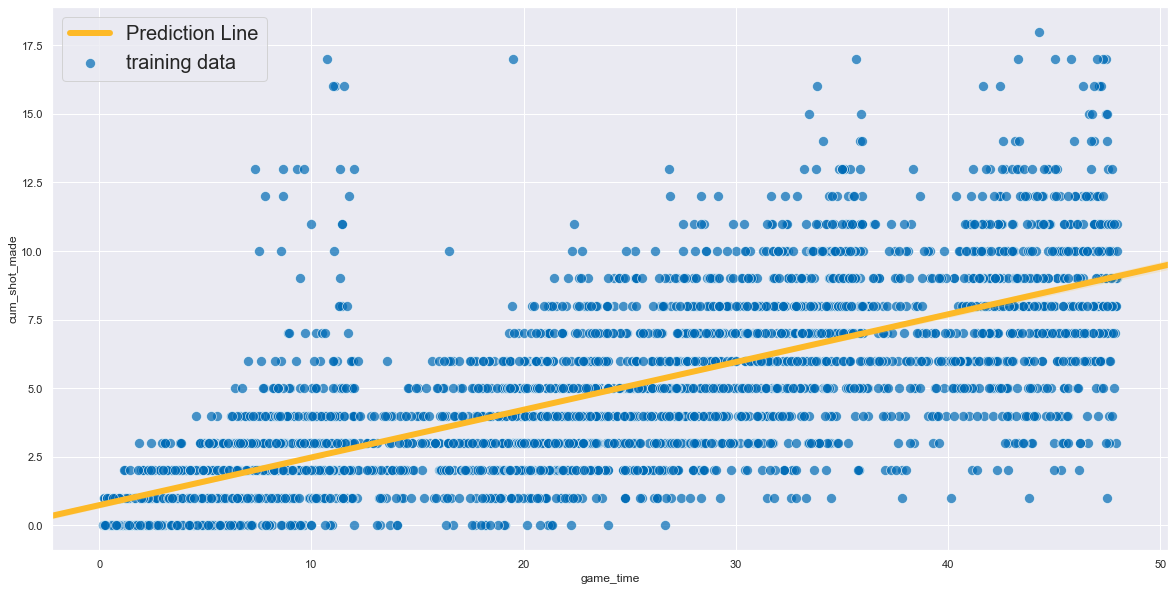

In [19]:
plt.subplots(figsize=(20,10))
sns.scatterplot(X_valid['game_time'],y_valid, alpha=0.7, s=100, label = 'training data')
sns.regplot(X_valid['game_time'],y_predicted,scatter=False, label = 'Prediction Line',line_kws={'lw':6, 'color':'#FDB927'})
plt.legend(loc=2, prop={'size': 20})

In [20]:
X = df_top[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = df_top['cum_shot_made']
model = make_pipeline(
    StandardScaler(), 
    PCA(), 
    GradientBoostingRegressor()
)
#for i in range(0,10):
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)
model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))

0.9698218127319186
0.9824568862585874


In [21]:
def return_model():
    return make_pipeline(
    StandardScaler(), 
    PCA(8), 
    GradientBoostingRegressor()
    )
def train_test(df,test_size):
    X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
    y = df['cum_shot_made']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    return X_train, X_valid, y_train, y_valid


In [73]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

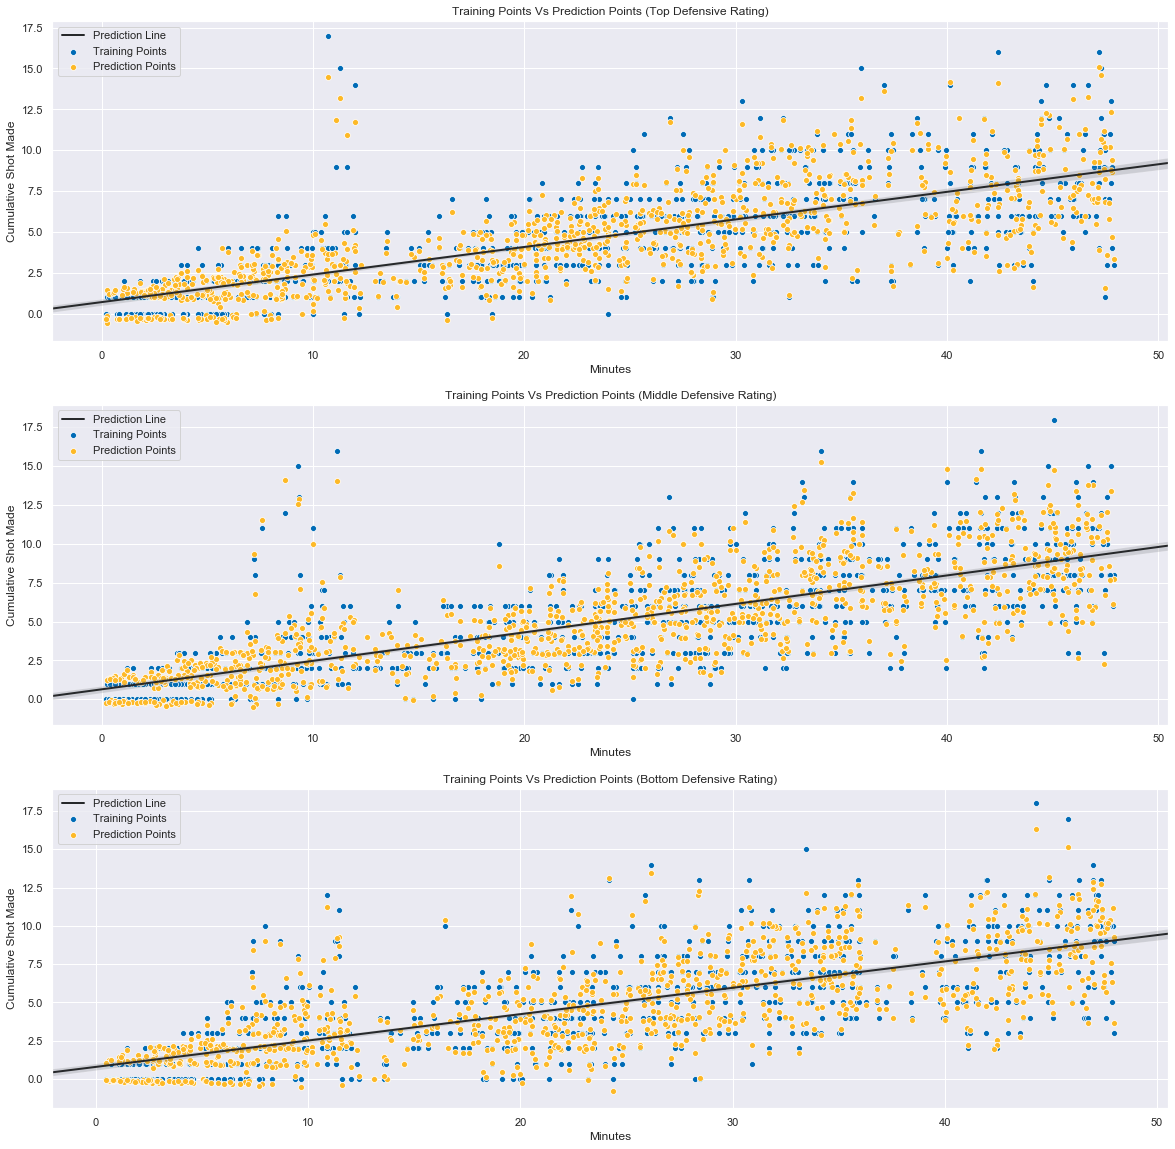

In [79]:
top_def_model = return_model()
mid_def_model = return_model()
bot_def_model = return_model()

#TOP DEFENSE
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
X_train, X_valid, y_train, y_valid = train_test(df_top, 0.25)
top_def_model.fit(X_train,y_train)
y_predict = top_def_model.predict(X_valid)
sns.scatterplot(X_valid['game_time'],y_valid,label='Training Points')
sns.scatterplot(X_valid['game_time'],y_predict,label = 'Prediction Points')
sns.regplot(X_valid['game_time'],y_predict,scatter=False, label = 'Prediction Line',line_kws={'lw':2, 'color':'#26282A'})
plt.xlabel("Minutes")
plt.ylabel("Cumulative Shot Made")
plt.title("Training Points Vs Prediction Points (Top Defensive Rating)")
plt.legend(loc='best')

#MID DEFENSE
plt.subplot(3,1,2)
X_train, X_valid, y_train, y_valid = train_test(df_mid, 0.25)
mid_def_model.fit(X_train,y_train) 
y_predict = mid_def_model.predict(X_valid)
sns.scatterplot(X_valid['game_time'],y_valid,label='Training Points')
sns.scatterplot(X_valid['game_time'],y_predict,label = 'Prediction Points')
sns.regplot(X_valid['game_time'],y_predict,scatter=False, label = 'Prediction Line',line_kws={'lw':2, 'color':'#26282A'})
plt.xlabel("Minutes")
plt.ylabel("Cumulative Shot Made")
plt.title("Training Points Vs Prediction Points (Middle Defensive Rating)")
plt.legend(loc='best')

#BOT DEFENSE
plt.subplot(3,1,3)
X_train, X_valid, y_train, y_valid = train_test(df_bot, 0.25)
bot_def_model.fit(X_train,y_train)
y_predict = bot_def_model.predict(X_valid)
sns.scatterplot(X_valid['game_time'],y_valid,label='Training Points')
sns.scatterplot(X_valid['game_time'],y_predict,label = 'Prediction Points')
sns.regplot(X_valid['game_time'],y_predict,scatter=False, label = 'Prediction Line',line_kws={'lw':2, 'color':'#26282A'})

plt.xlabel("Minutes")
plt.ylabel("Cumulative Shot Made")
plt.title("Training Points Vs Prediction Points (Bottom Defensive Rating)")
plt.legend(loc='best') 

plt.savefig('all-3-def-tiers-train-vs-predict.png')